In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [2]:
df_raw = pd.read_csv('BOSTON_HOUSING.csv',engine = 'python',encoding = 'cp949')
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


### 가설설정

1.범죄율이 적을수록 그 곳에 살고자 하는 사람이 많아 주택가격이 높을 것이다.      2.주거지 비율이 높을수록 근처에 가게들도 많아져 살기 편해 주택가격이 높을 것이다. 3.강이 보이면 주택가격이 높을 것이다.
4.산화질소 농도가 높을 수록 환경이 좋지 않은 것이므로 주택가격이 낮을 것이다.
5.중심지와 가까울수록 주택가격이 높을것이다.
6.학생당 교사 비율이 높다는 것은 교육이 좋다는 의미이므로 주택가격이 높을 것이다.

### 데이터 전처리

### 결측치, 이상치 확인후 처리하기

In [3]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


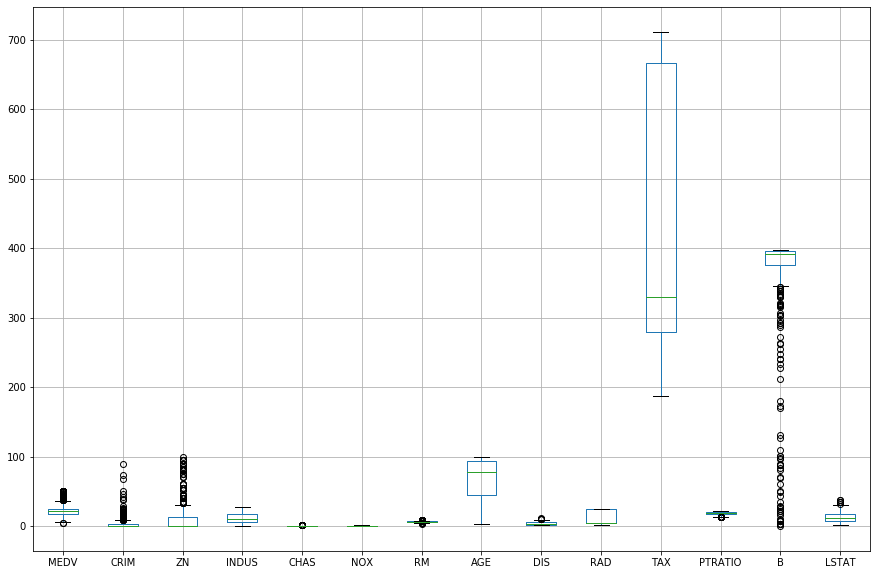

In [5]:
df_raw.boxplot(figsize=(15,10))

#### 분석 : 결측치는 존재하지 않았다. 이상치의 경우에는 흑인 인구 비율에서 이상치로 볼수 있는 데이터들이 많았다. 이상치로 보이는 데이터들이 많기때문에 모두 삭제하기에는 정확도가 떨어질것으로 간주하여 수정하지 않기로 하였다.

### Scatter Matrix

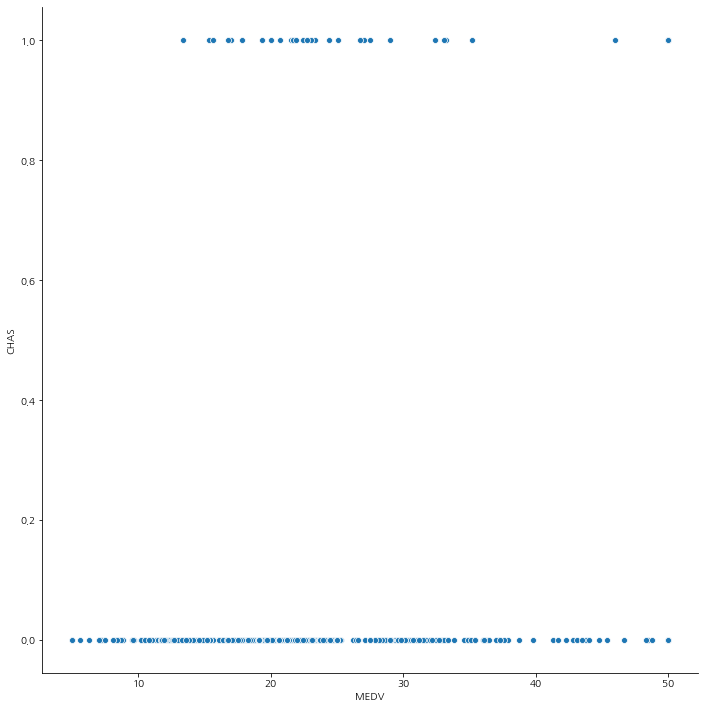

In [103]:
sns.pairplot(df_raw,x_vars = 'MEDV',y_vars = 'CHAS',size = 10)

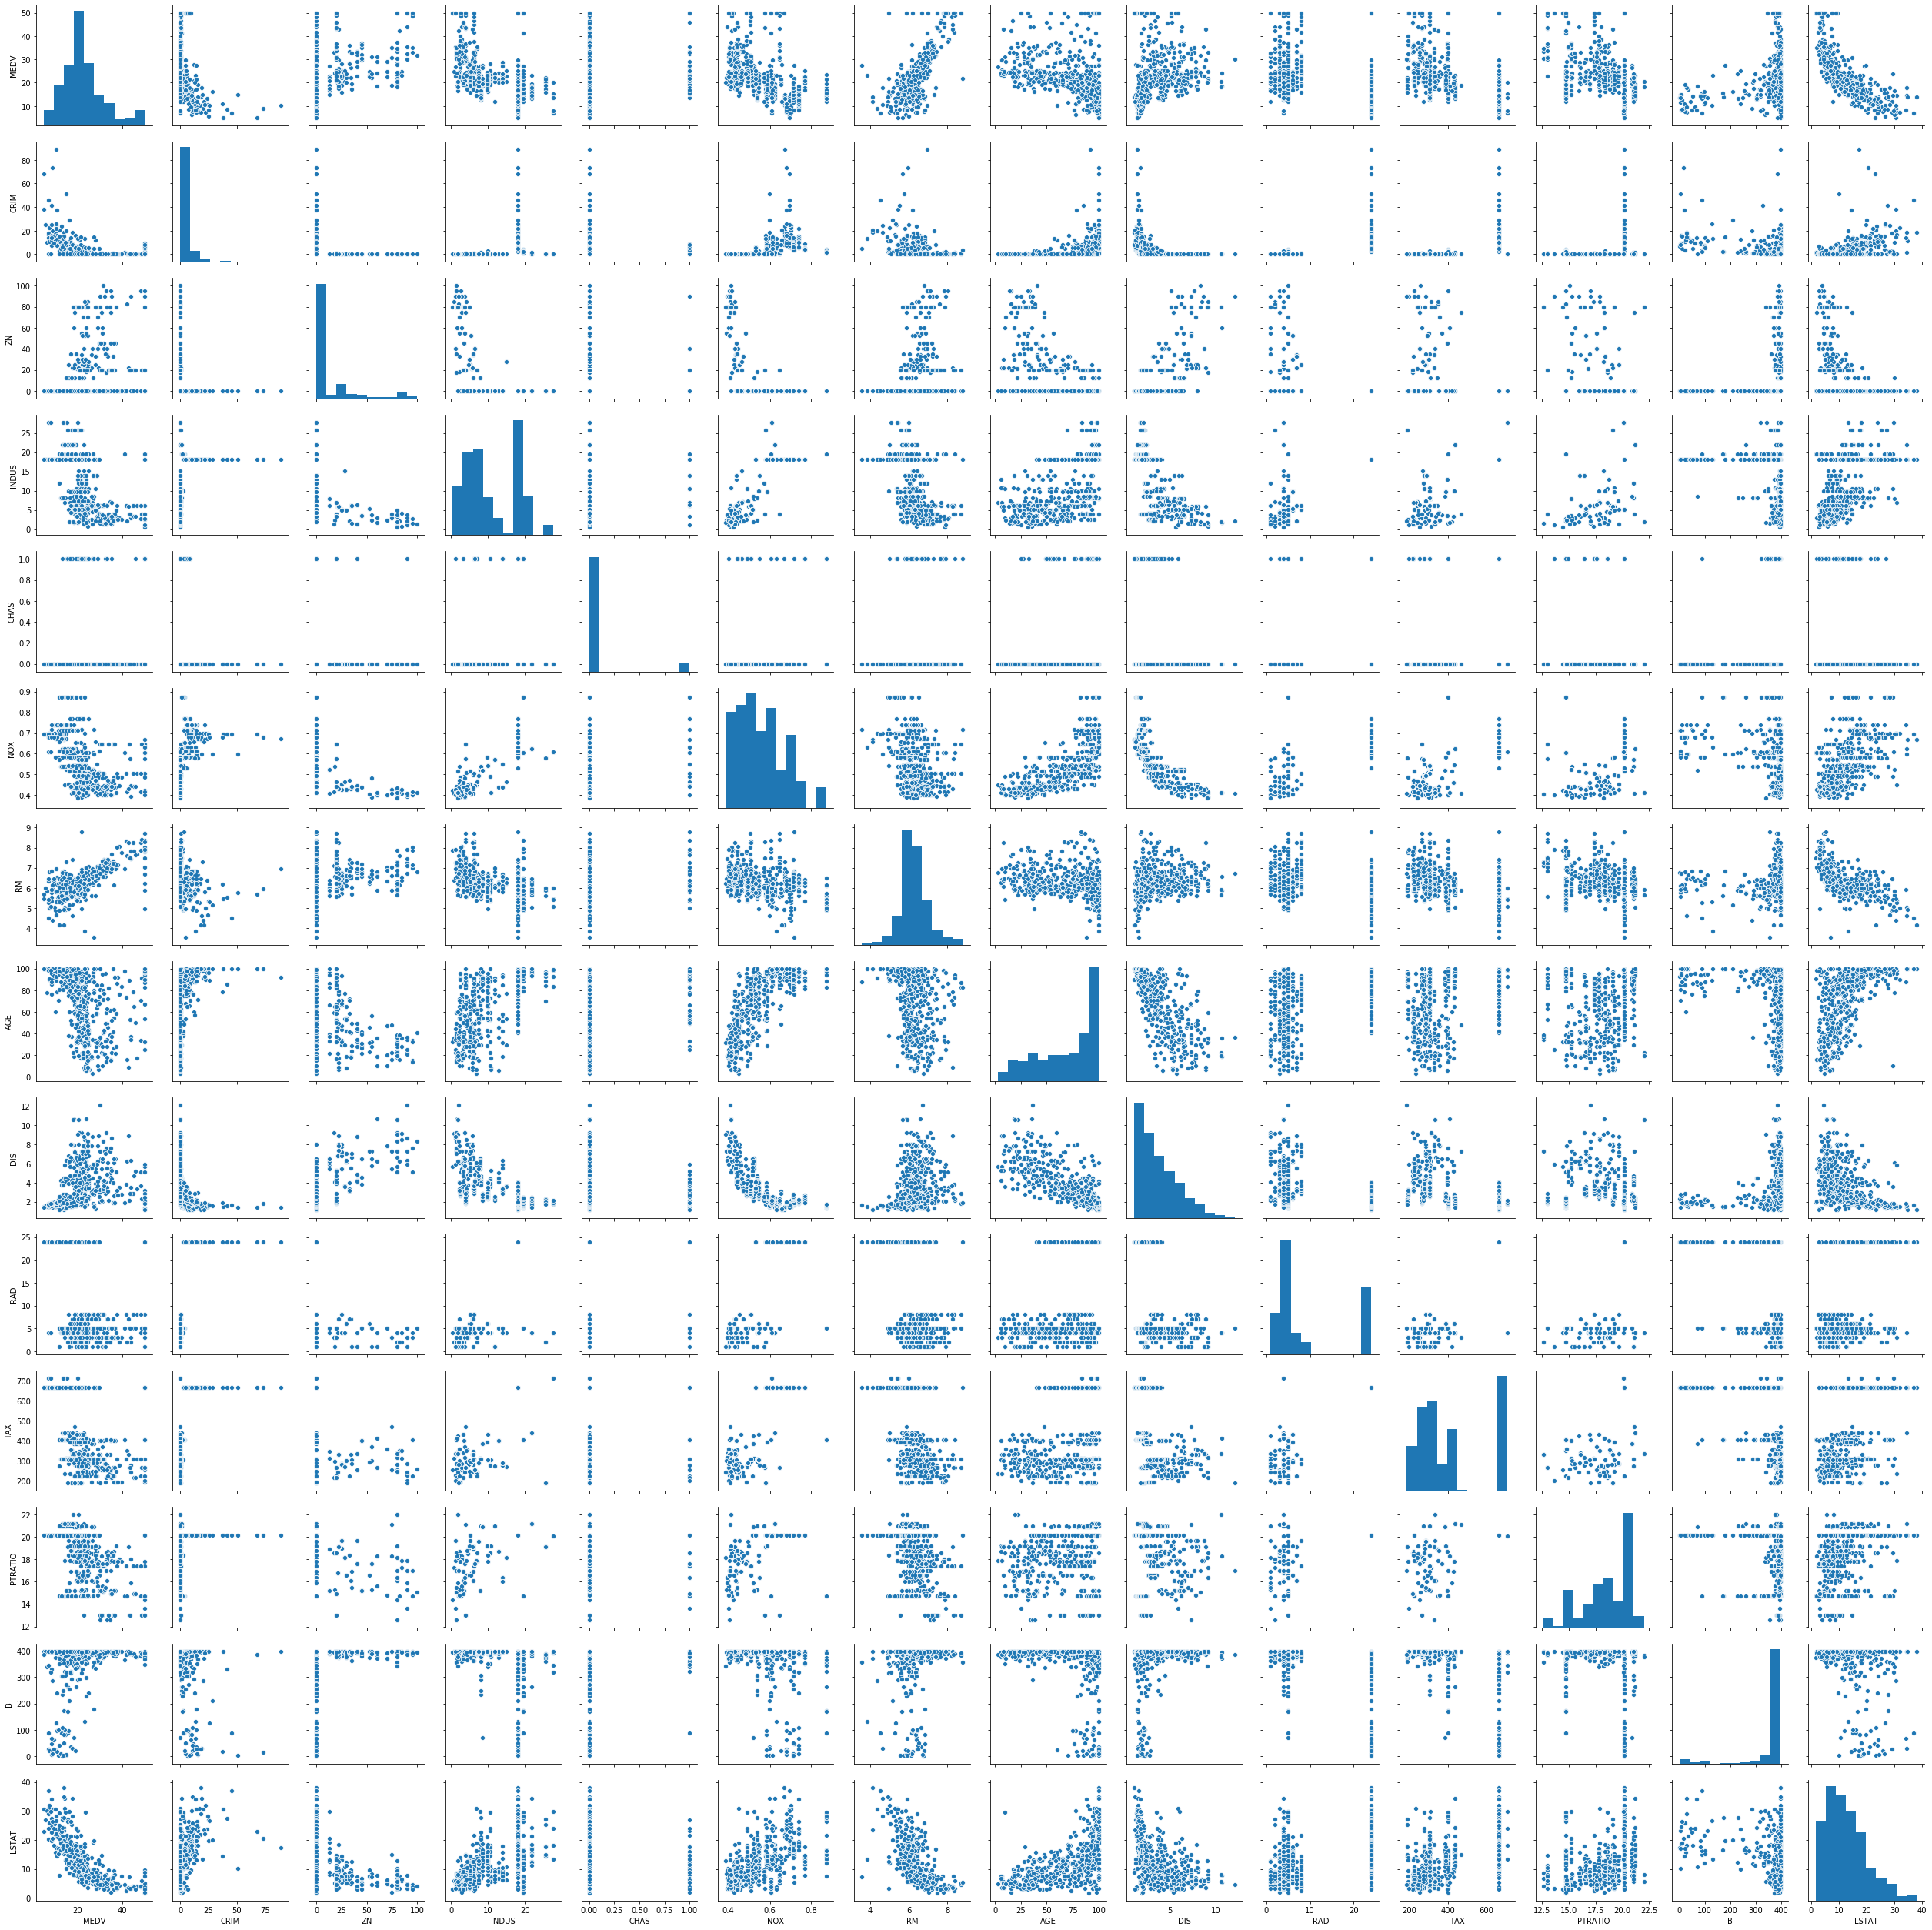

In [6]:
sns.pairplot(df_raw)

In [7]:
df_raw.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#### 분석 : 위의 그래프를 보면 주택가격과 범죄율은 반비례의 관계를 가지는 것으로 추측 가능하다. 주거당 평균 객실 수가 많아 질수록 주택가격은 증가한다. 저소득층의 비율이 적어질수록 주택가격이 높은 것을 추측해볼 수 있다.

In [8]:
df_raw.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


#### 분석 : 위의 상관관계표를 보면 대부분이 주택가격과 긴밀한 관계가 있는 것을 확인할 수 있었다. 그 중에서도 저소득층 비율,주거당 평균 객실수, 학생당 교사 비율의 제일 영향이 큰것으로 추측할 수 있었다.

### 회귀분석

In [9]:
reg_model = smf.ols(formula = 'MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        08:56:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### 분석 : p값이 0.05보다 작을수록  주택가격과 연관성이 높다. INDUS,AGE의 경우에는 p값이 0.05를 넘기때문에 주택가격과 연관성이 적은 것으로 보인다. 그중에서도 AGE는 0.958로 1에 매우 가까운 수치이기때문에 연관성이 거의 없다고 추측할 수 있다. 이는 73.4%의 설명력을 가진다.

In [10]:
df_raw = df_raw.drop('CHAS',axis = 1)

#### 분석 : chas는 범주형 데이터로 연속형인 MEDV와 비교할 수 없다고 판단하였다. 또한 상관분석을 해보았을때 MEDV와 큰 상관성이 없었으므로 제거하기로 판단하였다.

### VIF계산하기

In [11]:
df_x = df_raw.drop('MEDV',axis = 1)
df_x_const = sm.add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i)for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
11,B,1.345
10,PTRATIO,1.783
1,CRIM,1.788
5,RM,1.932
2,ZN,2.298
12,LSTAT,2.931
6,AGE,3.093
3,INDUS,3.949
7,DIS,3.955
4,NOX,4.389


#### 분석 : VIF가 높을 수록 다중공선성을 가진다고 말할 수 있다. 위의 표에서는 VIF들이 모두 매우 큰 값들은 아니므로 따로 데이터를 제거하지 않는 것으로 결정하였다. 

### 후진제거법(feature =7개)

In [12]:
df_y = df_raw['MEDV']
model = LinearRegression()

rfe = RFE(estimator = model,n_features_to_select = 7).fit(df_x,df_y)

selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print('Selected Variables:{}'.format(selected_cols))
print('Removed Variables:{}'.format(removed_cols))

Selected Variables:Index(['CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
Removed Variables:Index(['ZN', 'INDUS', 'AGE', 'TAX', 'B'], dtype='object')


In [13]:
rfe_reg_model = smf.ols(formula = 'MEDV ~ NOX+RM+PTRATIO+DIS+LSTAT+CRIM+RAD',data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          7.58e-132
Time:                        08:57:07   Log-Likelihood:                -1521.5
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     498   BIC:                             3093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2605      5.022      8.216      0.0

#### 분석 : feature의 개수를 4개부터 11개까지 변경해본 결과 모든 feature의 p값이 0.05보다 크게 나오도록 하는 수를 택하였다. 위의 8가지 feature를 넣었을때 모두 상관성이 있었으며 이는 71.2%의 설명력을 가진다

### 다중공선성 재진단

In [14]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = sm.add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values,i)for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF",inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
6,PTRATIO,1.524
1,CRIM,1.744
3,RM,1.762
7,LSTAT,2.517
4,DIS,2.567
5,RAD,2.655
2,NOX,3.512
0,const,524.441


#### 분석 : VIF의 값이 모두 5이하의 값이므로 다중공선성은 가지지 않는 것으로 판단하였다. 

### 미치는 영향정도를 그래프로 나타내기

In [15]:
scaler = StandardScaler()
cols = df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled,columns = cols)

df_scaled['MEDV'] = df_raw['MEDV']
reg_model_scaled = smf.ols(formula = 'MEDV ~ NOX+RM+PTRATIO+DIS+LSTAT+CRIM+RAD',data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          7.58e-132
Time:                        08:57:10   Log-Likelihood:                -1521.5
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     498   BIC:                             3093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.219    102.748      0.0

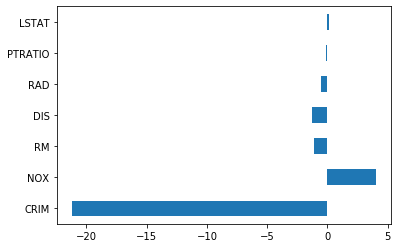

In [16]:
df_reg_coef = pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y = 'Coef',legend = False)

#### 분석 : 주요 설명변수로는 CRIM,NOX 순으로 관련성이 높은것을 확인할 수 있었다. 범죄율이 감소할때 주택가격은 상승하는 것을 추측할 수 있다.

### 잔차 분석하기

#### 등분산성 검정

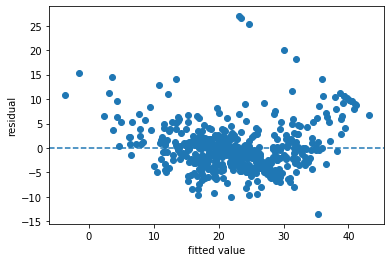

In [17]:
plt.scatter(reg_result_scaled.fittedvalues,reg_result_scaled.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0,linestyle = '--')

#### 분석 : 산포가 20을 중심으로 찍혀있는 것으로 보아 등분산성이 아닐 수 있다고 추정하였다.

#### 정규성 검정

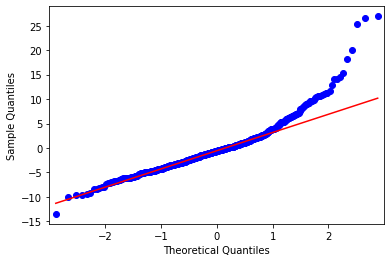

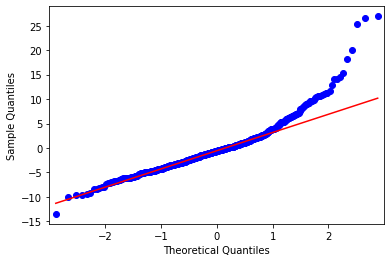

In [18]:
sm.qqplot(reg_result_scaled.resid,line = 'q')

In [19]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result_scaled.resid,axis = 0)

NormaltestResult(statistic=177.10503393275707, pvalue=3.4844202006119655e-39)

#### 분석 : 정규성을 분석해본결과 p값이 3.484로 0.05보다 크므로 정규성을 가지는 것을 확인할 수 있었다.

### Decision Tree

In [20]:
import os

os.environ['PATH']+=os.pathsep+'C:/Program Files(x86)/Graphviz2.38/bin/'

In [21]:
matplotlib.rc('font',family = 'NanumGothic')

In [22]:
#회귀분석에서 데이터를 변경하였으므로 다시 할당하였다.
df_raw = pd.read_csv('BOSTON_HOUSING.csv',engine = 'python',encoding = 'cp949')

### 데이터 지정

In [23]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop('MEDV',axis = 1,inplace = False)

In [24]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state = 1234)

print('Train data X size:{}'.format(df_train_x.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('Train data y size:{}'.format(df_train_y.shape))
print('test data y size:{}'.format(df_test_y.shape))

Train data X size:(354, 13)
test data X size:(152, 13)
Train data y size:(354,)
test data y size:(152,)


### 모델생성

In [25]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))

print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.858


#### 분석 : 모델생성결과 training set은 1로 overfitting인 것을 알수 있었다. 따라서 모델의 parameter 조정이 필요하다고 판단하였다.

### 모델parameter조정

### 1 . 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능

In [26]:
train_score=[];test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [27]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.858
1,2,0.987,0.849
2,3,0.973,0.865
3,4,0.951,0.854
4,5,0.928,0.861
5,6,0.898,0.853
6,7,0.885,0.843
7,8,0.874,0.838
8,9,0.862,0.831
9,10,0.849,0.831


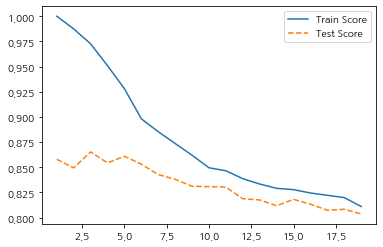

In [28]:
plt.plot(para_leaf,train_score,linestyle = "-",label='Train Score')
plt.plot(para_leaf,test_score,linestyle = '--',label = 'Test Score')
plt.legend()

#### 분석 :  train은 leaf의 개수가 많아질수록 감소하는 경향을 보인다. test는 증가와 감소를 반복하다가 꾸준히 감소한다. 따라서 train의 score가 높으면서 test가 증가하는 부분인 3을 선택하였다.

### 2. 분리노드의 최소 자료수 변경에다른 모델 성능(min_samples_split)

In [29]:
train_score = [];test_score = []

para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_sample_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 3,min_samples_split=v_min_sample_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.973,0.865
1,6,0.973,0.865
2,8,0.963,0.866
3,10,0.960,0.870
4,12,0.958,0.871
5,14,0.953,0.874
6,16,0.944,0.859
7,18,0.937,0.864
8,20,0.919,0.868
9,22,0.912,0.862


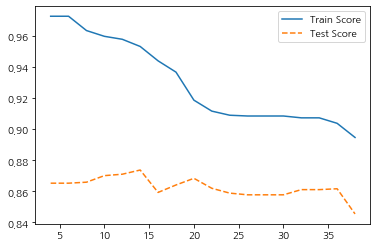

In [30]:
plt.plot(para_split,train_score,linestyle = '-',label='Train Score')
plt.plot(para_split,test_score,linestyle='--',label = 'Test Score')
plt.legend()

#### 분석 : train의 score가 7이후로 급격히 감소하는 경향을 보인다. test는 증가와 감소를 반복하므로 test를 기준으로 7과 14를 선택하였다.

#### 분리 노드의 최소 자료 수 변경 결과 비교(7 vs 14)

In [31]:
v_feature_name = df_train_x.columns

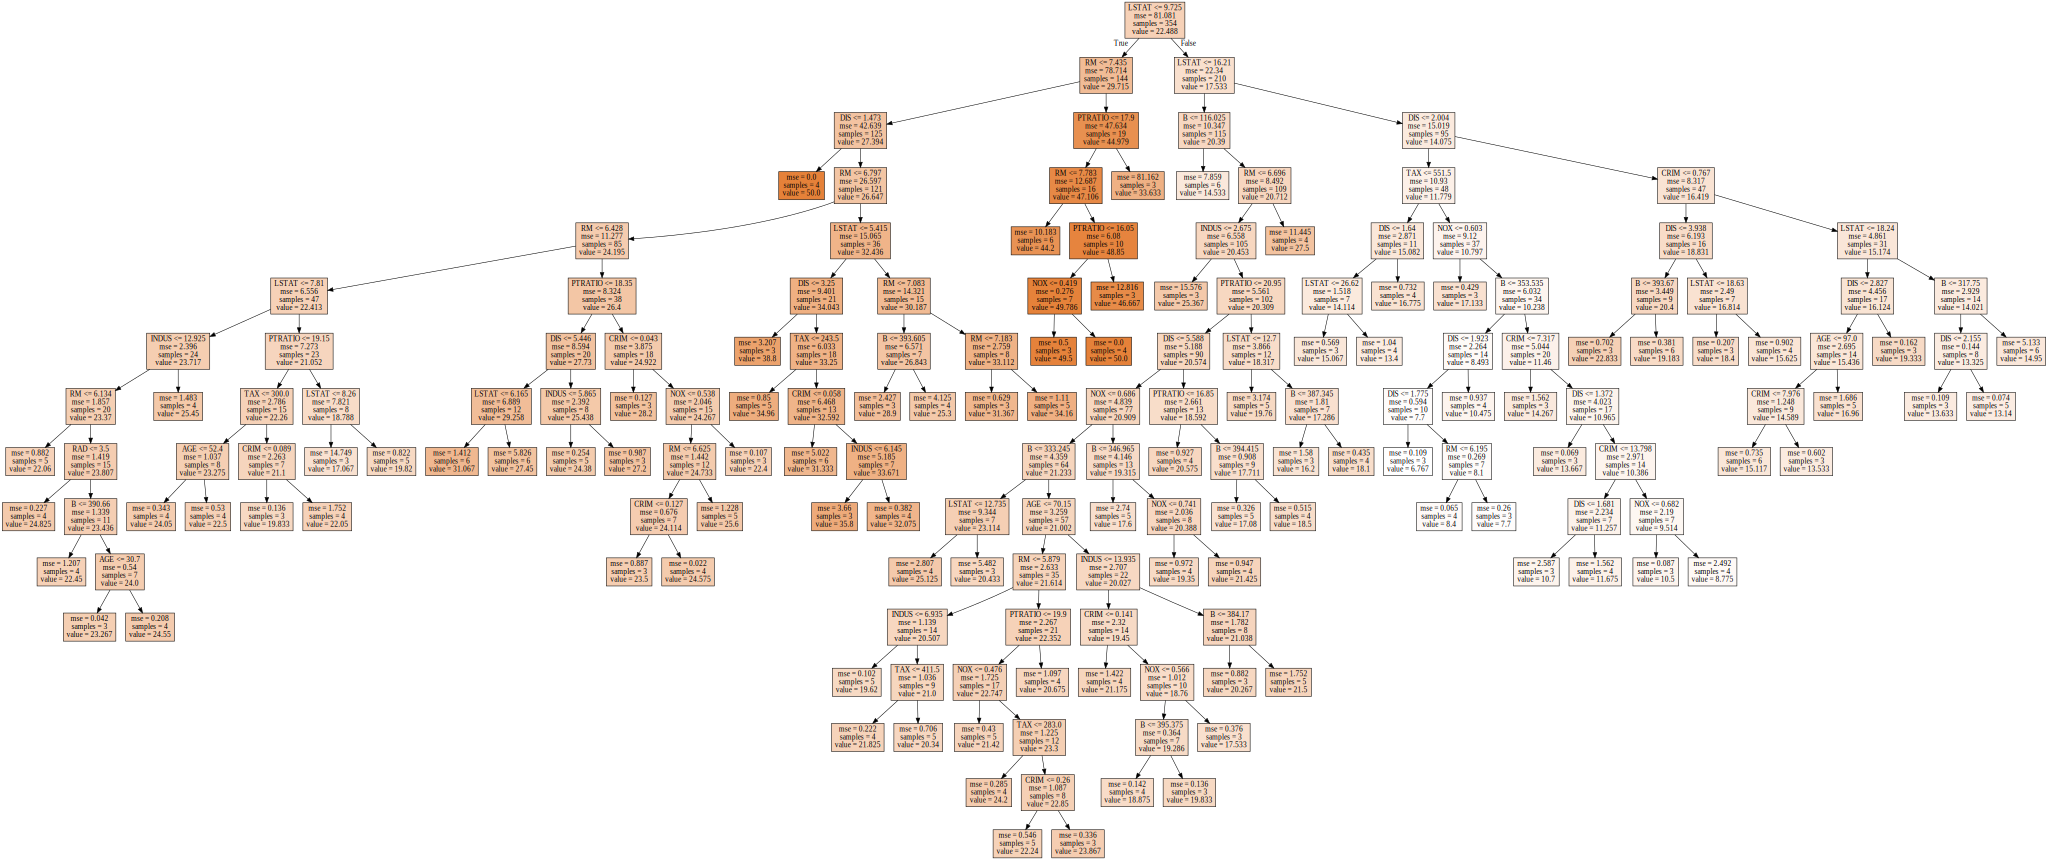

In [32]:
tree_graph = DecisionTreeRegressor(random_state = 1234,min_samples_leaf = 3,min_samples_split = 7)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file = 'tree_split.dot',feature_names=v_feature_name,impurity = True,filled = True)

with open('tree_split.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

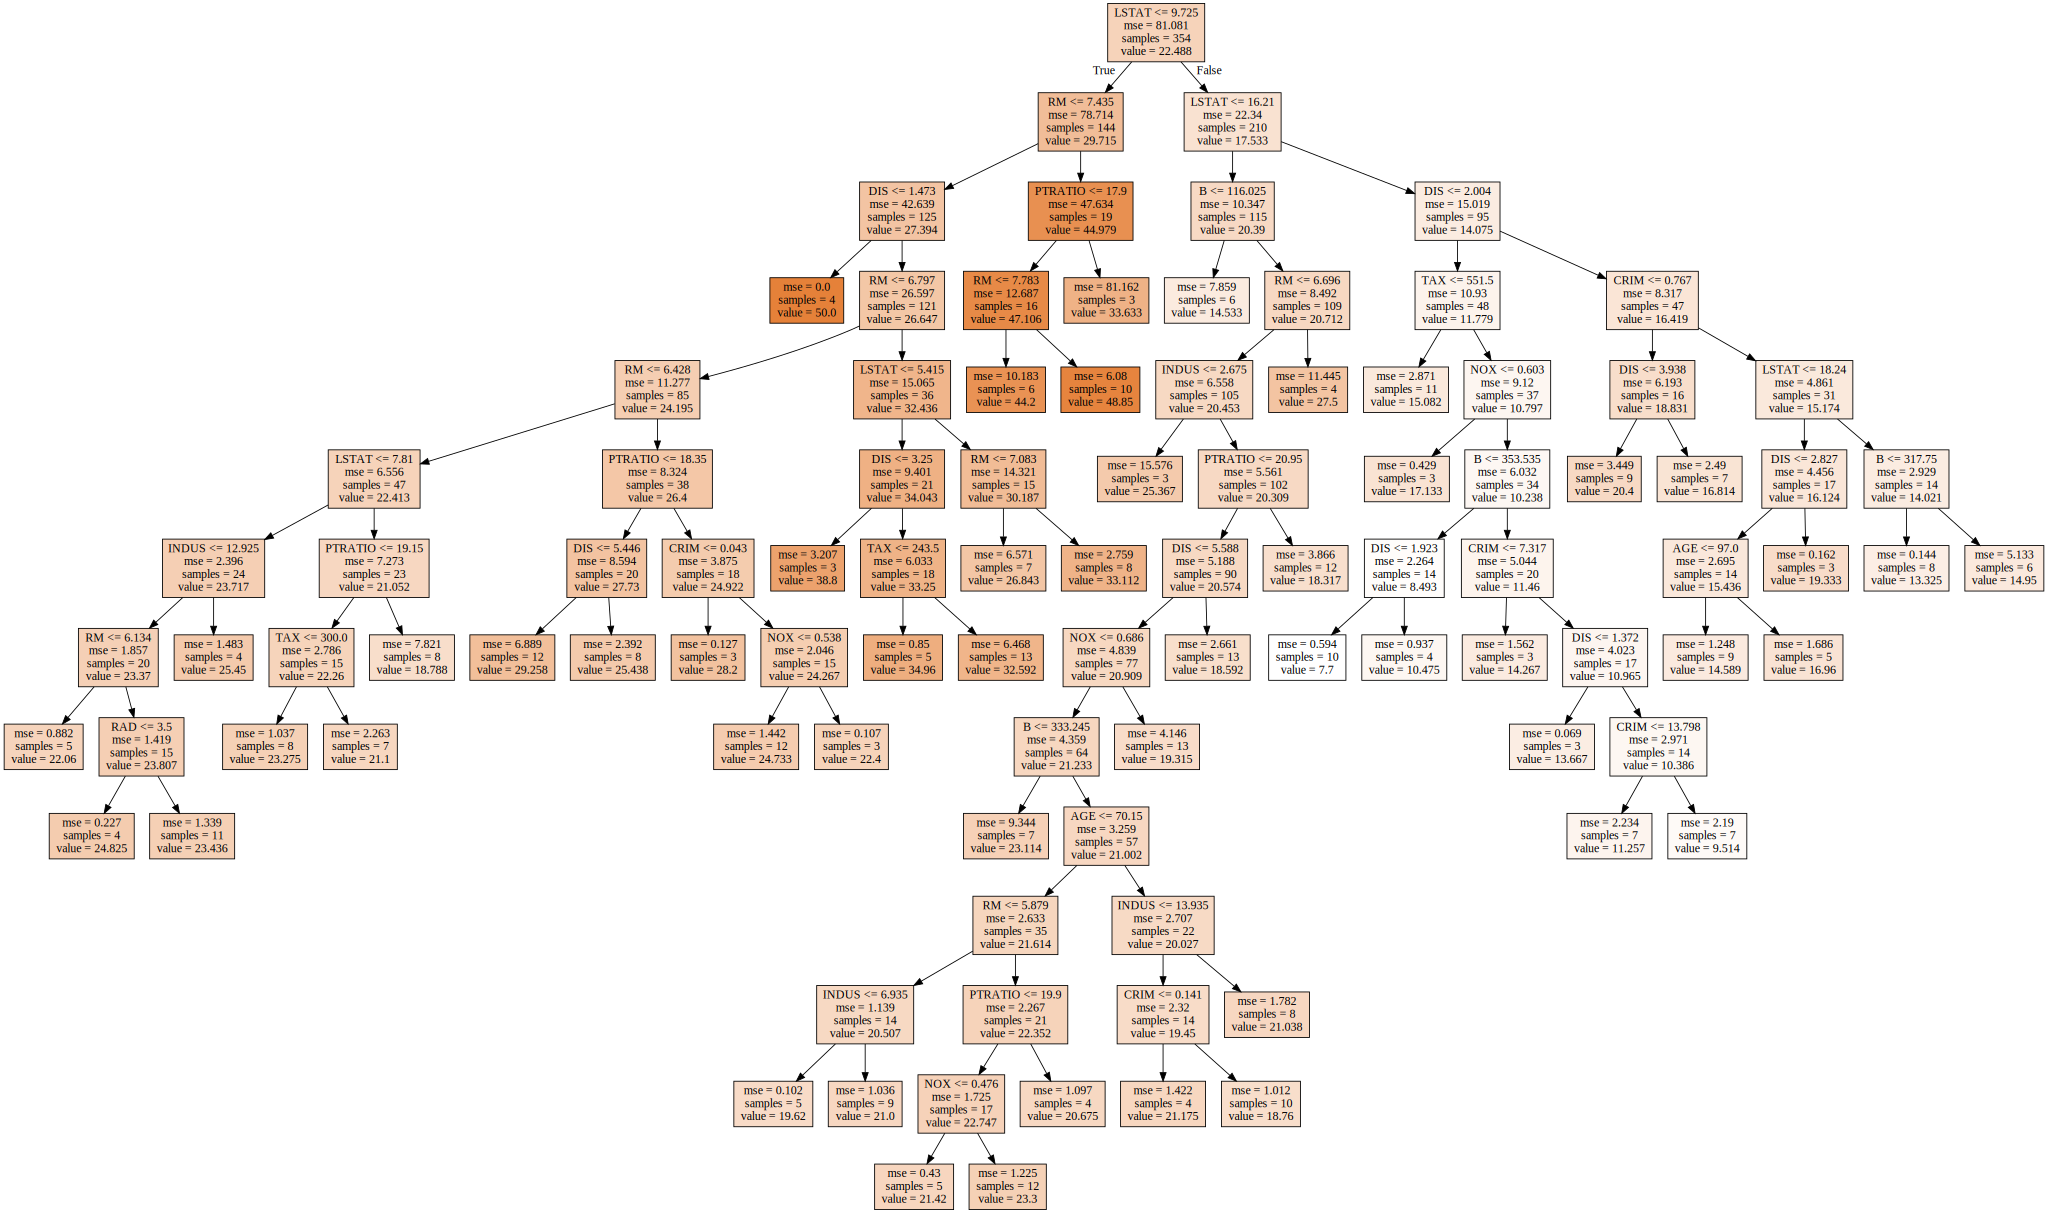

In [33]:
tree_graph = DecisionTreeRegressor(random_state = 1234,min_samples_leaf = 3,min_samples_split = 14)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file = 'tree_split.dot',feature_names=v_feature_name,impurity = True,filled = True)

with open('tree_split.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 분석 : min_samples_split를 7로 하였을 때 가지수가 너무 많아 overfitting의 위험이 있으므로 14를 선택하였다.

### 3. max_depth : 최대 깊이 변경에 따른 모델 성능

In [34]:
train_score=[];test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234,min_samples_leaf=3,min_samples_split=14,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

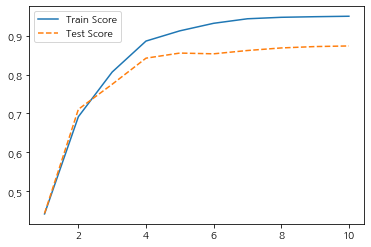

In [35]:
plt.plot(para_depth,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_depth,test_score,linestyle = '--',label = 'Test Score')
plt.legend()

#### 분석 : train과 test는 depth가 커질수록 증가한다. 4이후부터는 test의 score차이가 많이 나지 않으므로 4와 5를 선택해 보았다

### 3. max_depth에 따른 모델성능(4 vs 5)

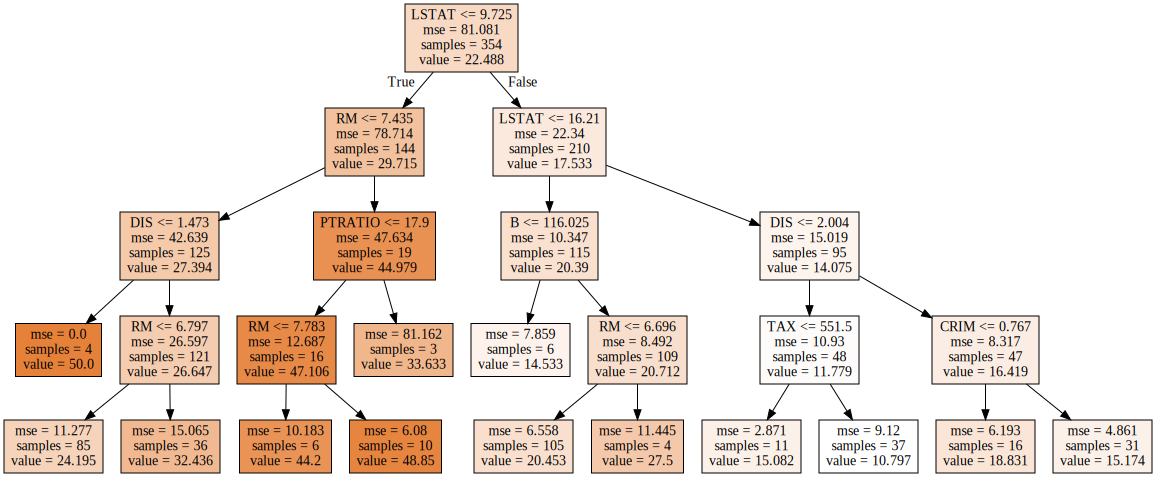

In [36]:
tree_graph = DecisionTreeRegressor(random_state = 1234,min_samples_leaf = 3,min_samples_split = 14,max_depth = 4)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file = 'tree_depth.dot',feature_names = v_feature_name,impurity = True,filled = True)

with open('tree_depth.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

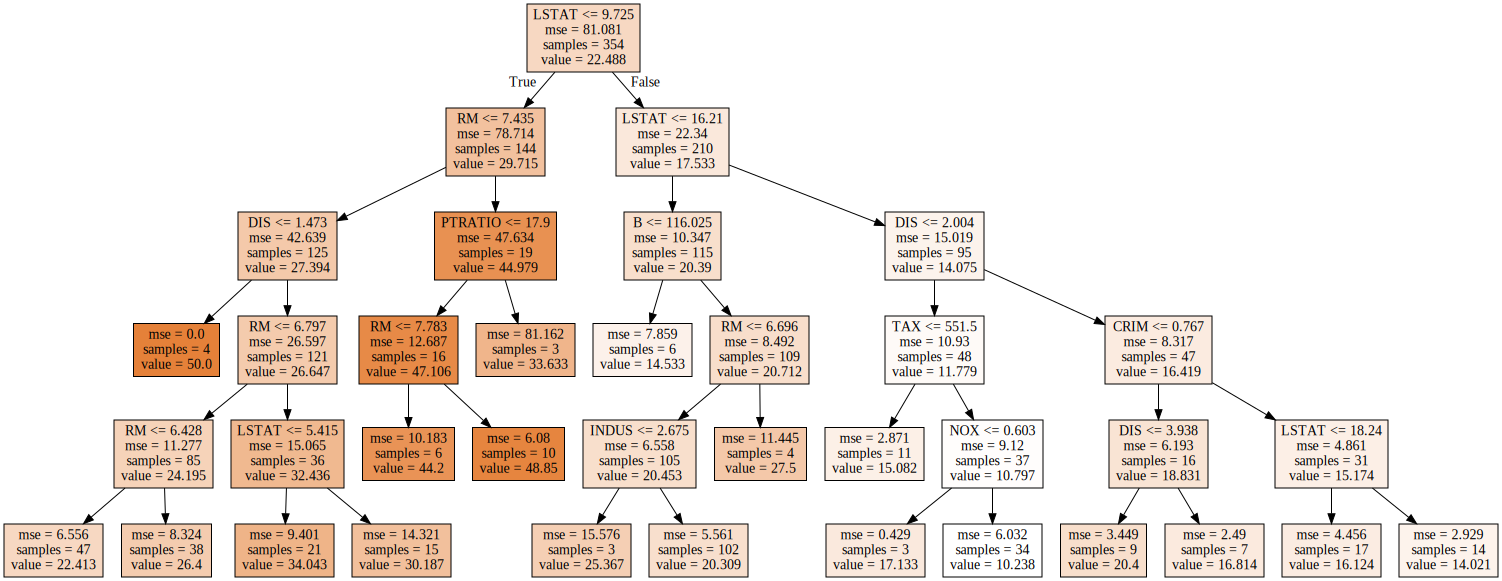

In [37]:
tree_graph = DecisionTreeRegressor(random_state = 1234,min_samples_leaf = 3,min_samples_split = 14,max_depth = 5)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file = 'tree_depth.dot',feature_names = v_feature_name,impurity = True,filled = True)

with open('tree_depth.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 분석 : mse를 비교해본결과 4보다 5일때 mse가 더 작으므로 5를 선택하였다.

### 최종 모델 선정

In [104]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 3,min_samples_split=14,max_depth = 5,random_state = 1234)
tree_final.fit(df_train_x,df_train_y)
print('정확도:',tree_final.score(df_train_x,df_train_y).round(3))
print('정확도:',tree_final.score(df_test_x,df_test_y).round(3))

정확도: 0.912
정확도: 0.855


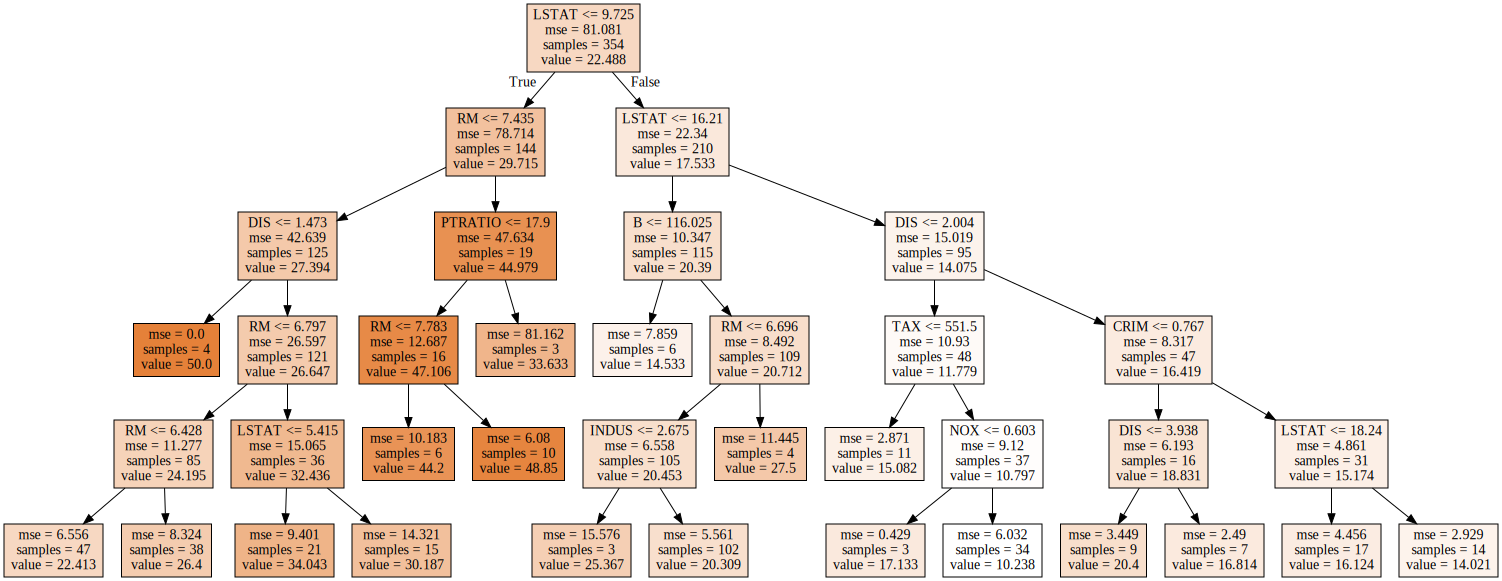

In [105]:
export_graphviz(tree_final,out_file = 'tree_final.dot',feature_names = v_feature_name,impurity=True,filled=True)

with open('tree_final.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 결론 도출

In [40]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['importance'] = tree_final.feature_importances_

df_importance.sort_values('importance',ascending=False,inplace = True)
df_importance.round(3)

,Feature,importance
12,LSTAT,0.569
5,RM,0.283
7,DIS,0.102
10,PTRATIO,0.018
11,B,0.008
9,TAX,0.006
0,CRIM,0.005
4,NOX,0.005
2,INDUS,0.003
1,ZN,0.000


Text(0, 0.5, '변수')

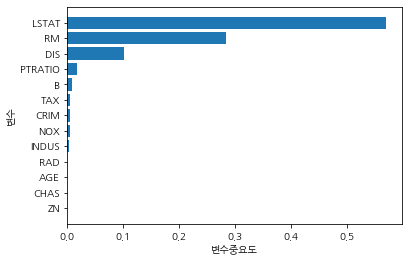

In [41]:
df_importance.sort_values('importance',ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,width = df_importance['importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

#### 분석 : 변수의 중요도는 LSTAT,RM,DIS순으로 가장 중요하였다. 그중에서도 저소득층 비율에따라 주택가격의 차이가 많이나는 것으로 추측할 수 있었다.

### RandomForest

In [42]:
matplotlib.rc('font',family = 'NanumGothic')

In [43]:
df_raw = pd.read_csv('BOSTON_HOUSING.csv',engine = 'python',encoding = 'cp949')

### 데이터 지정

In [44]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop('MEDV',axis = 1,inplace = False)

In [45]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state = 1234)

print('Train data X size:{}'.format(df_train_x.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('Train data y size:{}'.format(df_train_y.shape))
print('test data y size:{}'.format(df_test_y.shape))

Train data X size:(354, 13)
test data X size:(152, 13)
Train data y size:(354,)
test data y size:(152,)


### 모델생성

In [46]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.975
Score on test set:0.876


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### 분석 : training set의 값이 1에 가까운 것으로 보아 overfitting으로 추측된다. 모델 parameter값 조정이 필요하다.

### 모델 parameter조정

### n_estimator: 트리수 변경에 따른 모델 성능

In [47]:
train_score = [];test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators,random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [48]:
df_score_n

,n_estimators,TrainScore,TestScore
0,10,0.974946,0.875642
1,20,0.979974,0.896348
2,30,0.979872,0.895955
3,40,0.978529,0.897731
4,50,0.979017,0.895329
5,60,0.980664,0.898853
6,70,0.980706,0.897758
7,80,0.981802,0.897735
8,90,0.981985,0.897376
9,100,0.981207,0.897798


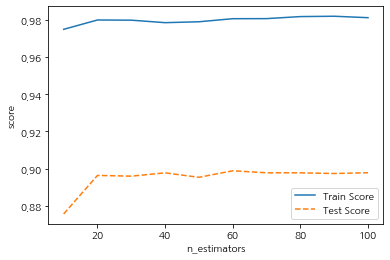

In [49]:
plt.plot(para_n_tree,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_n_tree,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

#### 분석 : 대략 20개 이후로 train과 test의 score가 크게 변하지 않으면서 높은 score값을 보인다. 더 확실히 정하기 위하여 세부적으로 본다.

### 세부적으로 보기

In [50]:
train_score = [];test_score = []
para_n_tree = [n_tree*5 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators,random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

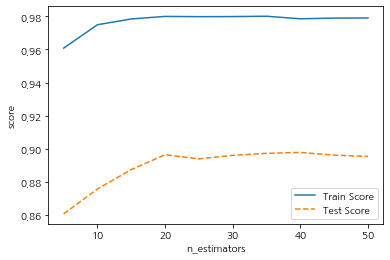

In [51]:
plt.plot(para_n_tree,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_n_tree,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

#### 분석 : 자세히 봤을때 앞의 추측대로 20개 일때 train과 test 모두 높은 score을 가지고 있다. 따라서 20을 선택하였다.

### min_samples_leaf:잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [52]:
train_score = [];test_score = []
para_leaf = [n_tree*1 for n_tree in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 20,random_state = 1234,min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
# df_score_leaf['Train-Val'] = df_score_leaf['TrainScore']-df_score_leaf['ValScore']

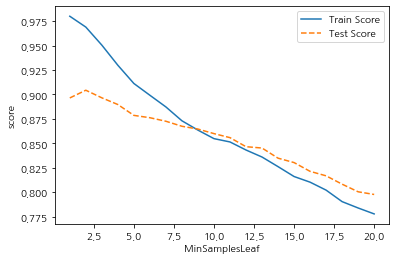

In [53]:
plt.plot(para_leaf,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_leaf,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('MinSamplesLeaf')
plt.legend()

#### 분석 : train은 leaf가 증가함에 따라 급격하게 감소한다. 그러므로 test를 기준으로 test의 score가 최고점을 가지는 2으로 선택하였다

### min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [54]:
train_score = [];test_score = []
para_split = [n_tree*2 for n_tree in range(1,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 20,random_state = 1234,min_samples_leaf = 2,min_samples_split = v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

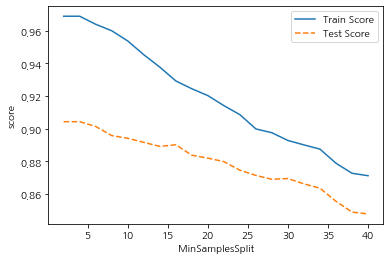

In [55]:
plt.plot(para_split,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_split,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('MinSamplesSplit')
plt.legend()

#### 분석 : train과 test모두 split가 증가할 수록 감소하는 모습을 보인다. train이 급격히 감소하기 전인 4선택하였다.

### max_depth: 최대 깊이 변경에 다른 모델 성능

In [56]:
train_score = [];test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 20,random_state = 1234,min_samples_leaf = 2,min_samples_split = 4,max_depth = v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['mat depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

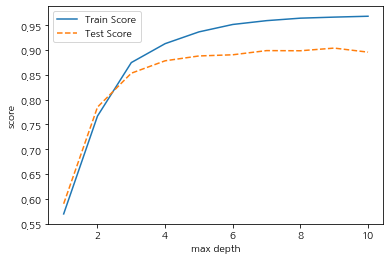

In [57]:
plt.plot(para_depth,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_depth,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('max depth')
plt.legend()

#### 분석 : train과 test모두 depth가 커질수록 증가하는 모습을 보인다. 각각 특정한 지점에서 상승하는 폭이 달라진다. 따라서 그 지점을 기준으로 살펴본결과로 5를 선택하였다.

### 결론도출 - 최종 모델 생성

In [58]:
rf_final = RandomForestRegressor(random_state = 1234,n_estimators=20,min_samples_leaf=2,min_samples_split=4,max_depth=5)

rf_final.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))

Score on training set:0.937
Score on test set:0.888


#### 분석 : 처음 모델을 생성했을 때보다 train의 score는 감소하였다. 이를 보면 overfitting의 위험을 감소 시킨것으로 볼 수 있다. 반대로 test score의 값이 증가하였으므로 기존의 모델보다 잘 만들어졌다고 할 수 있다.

### 최종모델 시각화

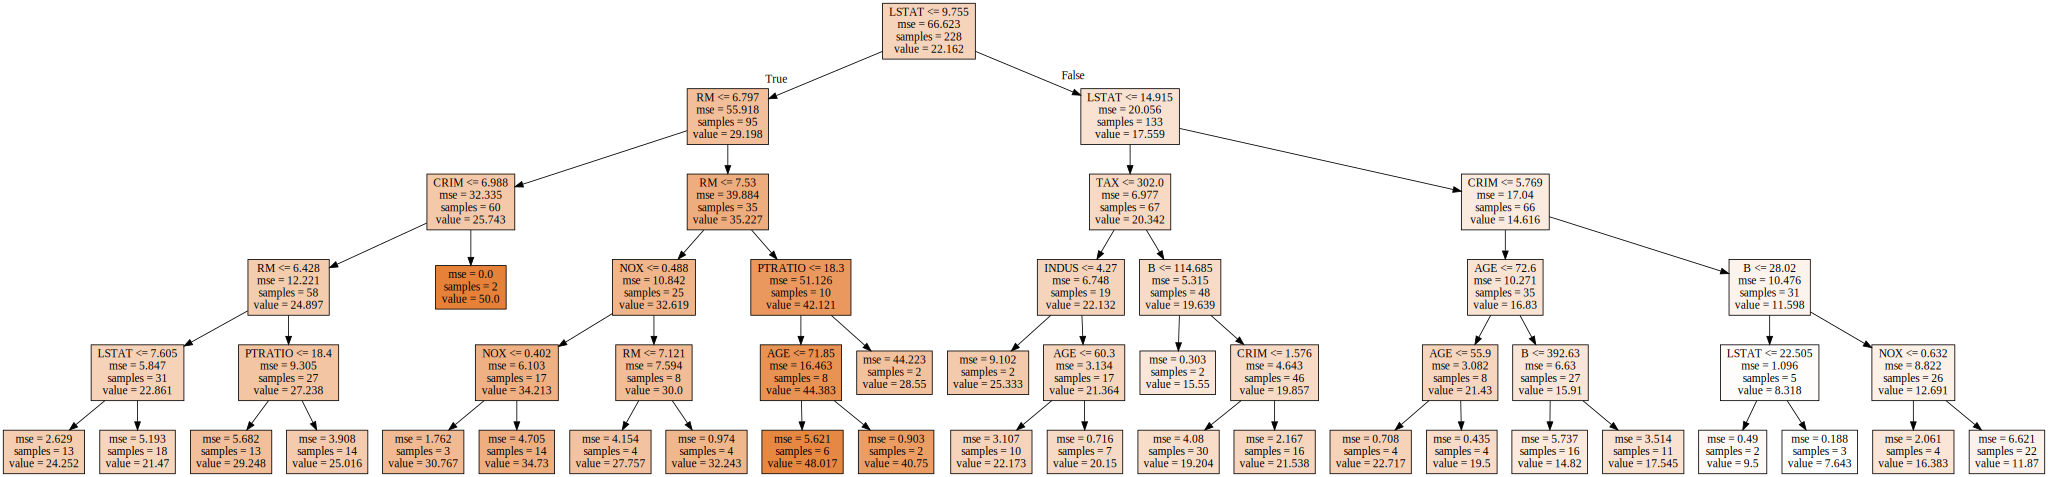

In [59]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0],out_file = 'rfr_final_0.dot',feature_names = v_feature_name,impurity=True,filled=True)

with open('rfr_final_0.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

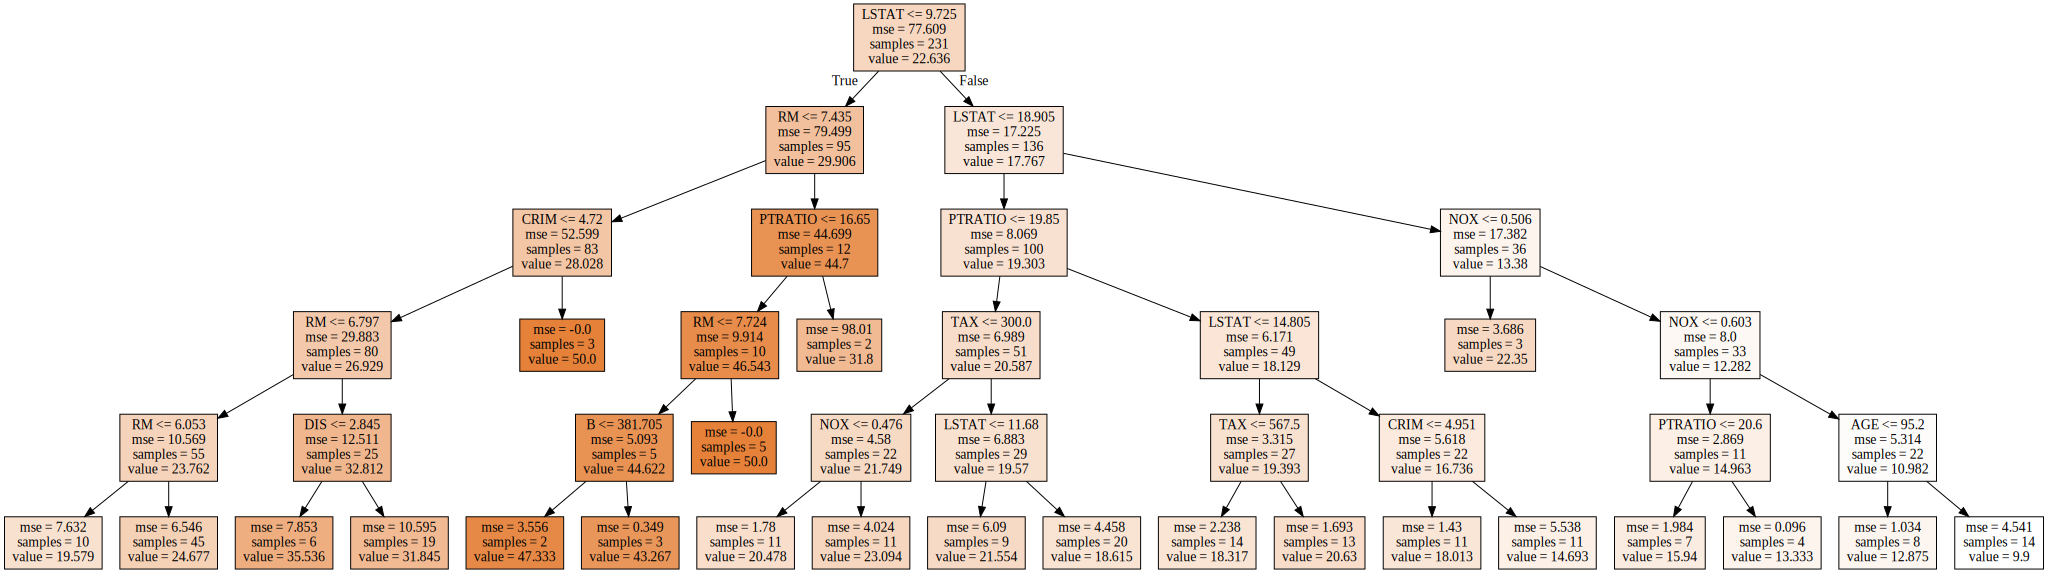

In [60]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[10],out_file = 'rfr_final_10.dot',feature_names = v_feature_name,impurity=True,filled=True)

with open('rfr_final_10.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 결론 도출 - 설명변수의 중요도

In [61]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance',
                          ascending=False,inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.490
5,RM,0.346
7,DIS,0.066
0,CRIM,0.030
10,PTRATIO,0.022
4,NOX,0.014
6,AGE,0.012
9,TAX,0.007
11,B,0.007
2,INDUS,0.004


Text(0, 0.5, '변수')

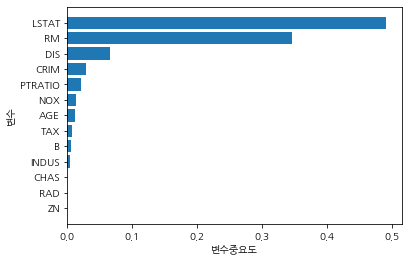

In [62]:
df_importance.sort_values('Importance',ascending=True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

#### 분석 : 중요 설명변수로는 LSTAT,RM순으로 영향이 크다고 할 수 있다.

### Gradient Boosting

In [63]:
matplotlib.rc('font',family = 'NanumGothic')

In [64]:
df_raw = pd.read_csv('BOSTON_HOUSING.csv',engine = 'python',encoding = 'cp949')

### 데이터 지정

In [65]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop('MEDV',axis = 1,inplace = False)

In [66]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state = 1234)

print('Train data X size:{}'.format(df_train_x.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('Train data y size:{}'.format(df_train_y.shape))
print('test data y size:{}'.format(df_test_y.shape))

Train data X size:(354, 13)
test data X size:(152, 13)
Train data y size:(354,)
test data y size:(152,)


### 모델생성

In [67]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.902


#### test set의 score도 높지만 training set의 score도 높은것으로 보아 overfitting의 위험이 있다. 모델parameter의 조정이 필요하다

### 모델 parameter조정

### n_estimator: 트리수 변경에 따른 모델 성능

In [68]:
train_score = [];test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

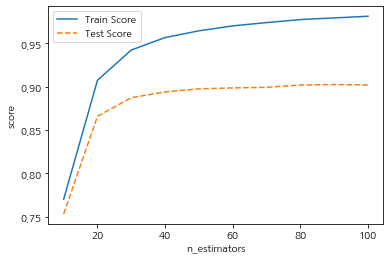

In [69]:
plt.plot(para_n_tree,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_n_tree,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

#### 분석 : training과 test모두 특정기점을 중심으로 급격하게 상승한다. 정확히 확인하기 위하여 아래에서 40과 60부근에서 train과 test를 비교하였다

In [70]:
train_score = [];test_score = []
para_n_tree = [n_tree*5 for n_tree in range(4,13)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

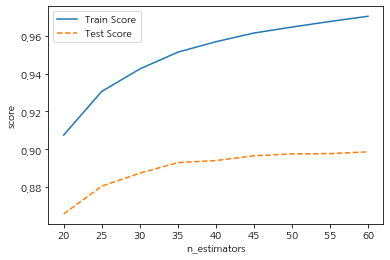

In [71]:
plt.plot(para_n_tree,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_n_tree,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

#### 분석 : train은 꾸준히 증가하고 test는 증가와 감소를 반복하므로 test를 기준으로 45를 선택하였다.

### min_samples_leaf:잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [72]:
para_leaf

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [73]:
train_score = [];test_score = []
para_leaf = [n_tree*1 for n_tree in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 45,random_state = 1234,min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

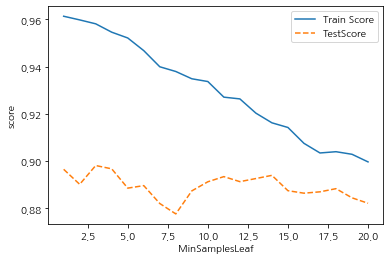

In [74]:
plt.plot(para_leaf,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_leaf,test_score,linestyle = '--',label = 'TestScore')
plt.ylabel('score');plt.xlabel('MinSamplesLeaf')
plt.legend()

#### 분석 : train은 leaf가 증가함에 따라 급격하게 감소한다. test는 증가와 감소를 반복한다. train의 score가 낮지 않으면서 test의 값이 높은 값을 고려하여 3을 선택하였다.

### min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [75]:
train_score = [];test_score = []
para_split = [n_tree*2 for n_tree in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 45,random_state = 1234,min_samples_leaf = 3,min_samples_split = v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

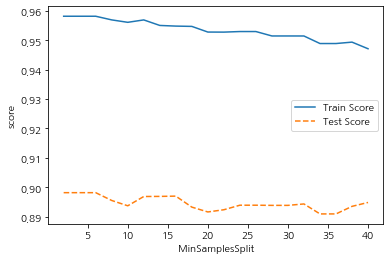

In [76]:
plt.plot(para_split,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_split,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('MinSamplesSplit')
plt.legend()

#### 분석 : train은 대략 7인 지점에서 감소하는 경향을 보인다. test는 증가와 감소를 반복하므로 train과 test가 가까워지는 지점인 16을 선택하였다

### max_depth: 최대 깊이 변경에 다른 모델 성능

In [77]:
train_score = [];test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 45,random_state = 1234,min_samples_leaf = 3,min_samples_split = 16,max_depth = v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['max depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

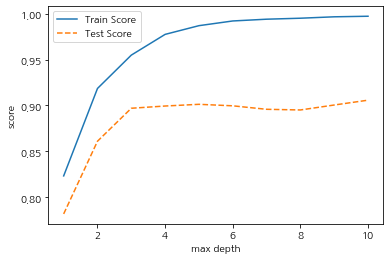

In [78]:
plt.plot(para_depth,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_depth,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('max depth')
plt.legend()

#### 분석 : train은 5를 기점으로 매우 높은 score에 도달하였다. test는 3을 기점으로 점차 감소하기 시작하므로 4를 선택하였다.

### learning_rate : 학습률 변경에 따른 모델 성능

In [79]:
train_score = [];test_score = []
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 45,random_state = 1234,min_samples_leaf = 3,min_samples_split = 16,max_depth = 4,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

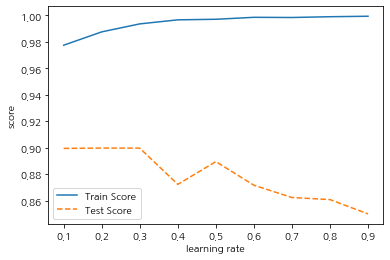

In [80]:
plt.plot(para_lr,train_score,linestyle = '-',label = 'Train Score')
plt.plot(para_lr,test_score,linestyle = '--',label = 'Test Score')
plt.ylabel('score');plt.xlabel('learning rate')
plt.legend()

#### 분석 : train의 경우 0.2이후로 급격히 증가한다. test는 0.3이후로 하강하는 경향을 보이므로 test를 기준으로 0.3를 선택하였다

### 결론도출 - 최종 모델 생성

In [107]:
gb_final = GradientBoostingRegressor(random_state = 1234,n_estimators=45,min_samples_leaf=4,min_samples_split=16,max_depth=4,learning_rate=0.3)

gb_final.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))

Score on training set:0.993
Score on test set:0.907


#### 분석 : train set과 test set모두 0.9를 넘어가므로 모델이 괜찮다고 생각할 수 있다

### 결론 도출

In [82]:
v_feature_name = df_train_x.columns

In [83]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance',
                          ascending=False,inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.548
5,RM,0.258
7,DIS,0.100
10,PTRATIO,0.018
0,CRIM,0.016
9,TAX,0.013
11,B,0.013
6,AGE,0.012
4,NOX,0.011
2,INDUS,0.006


Text(0, 0.5, '변수')

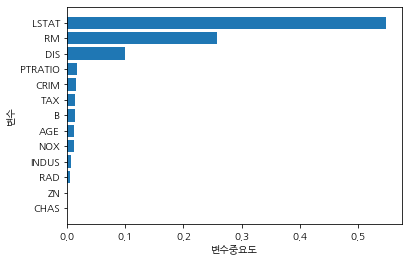

In [84]:
df_importance.sort_values('Importance',ascending=True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

#### 분석 : 중요 설명변수들은 LSTAT,RM,DIS의 순으로 높은 영향력이 크다고 해석할 수 있다.

### 모델평가 실습

In [85]:
df_raw = pd.read_csv('BOSTON_HOUSING.csv',engine = 'python',encoding = 'cp949')

In [86]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop('MEDV',axis = 1,inplace = False)

In [87]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state = 1234)

print('Train data X size:{}'.format(df_train_x.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('Train data y size:{}'.format(df_train_y.shape))
print('test data y size:{}'.format(df_test_y.shape))

Train data X size:(354, 13)
test data X size:(152, 13)
Train data y size:(354,)
test data y size:(152,)


In [88]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [89]:
#회귀모델
lr_model = smf.ols(formula='MEDV ~ NOX+RM+PTRATIO+DIS+LSTAT+CRIM+RAD',data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

#Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 3,min_samples_split=14,max_depth = 5,random_state = 1234)
dt_model.fit(df_train_x,df_train_y)

#Random Forest
rf_model = RandomForestRegressor(random_state = 1234,n_estimators=20,min_samples_leaf=2,min_samples_split=4,max_depth=5)
rf_model.fit(df_train_x,df_train_y)

#Gradient Boosting
gb_model = GradientBoostingRegressor(random_state = 1234,n_estimators=45,min_samples_leaf=4,min_samples_split=16,max_depth=4,learning_rate=0.3)
gb_model.fit(df_train_x,df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          7.58e-132
Time:                        08:58:00   Log-Likelihood:                -1521.5
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     498   BIC:                             3093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2605      5.022      8.216      0.0

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=16,
                          min_weight_fraction_leaf=0.0, n_estimators=45,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
models = ['회귀분석','의사결정나무','랜덤 포레스트','그래디언트 부스팅']

mse,rmse,mae,mape = [],[],[],[]

### 예측 및 평가

### 회귀분석

In [91]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

### 의사결정나무

In [92]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

### 랜덤 포레스트

In [93]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

### 그래디언트 부스팅

In [94]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

### 시각화

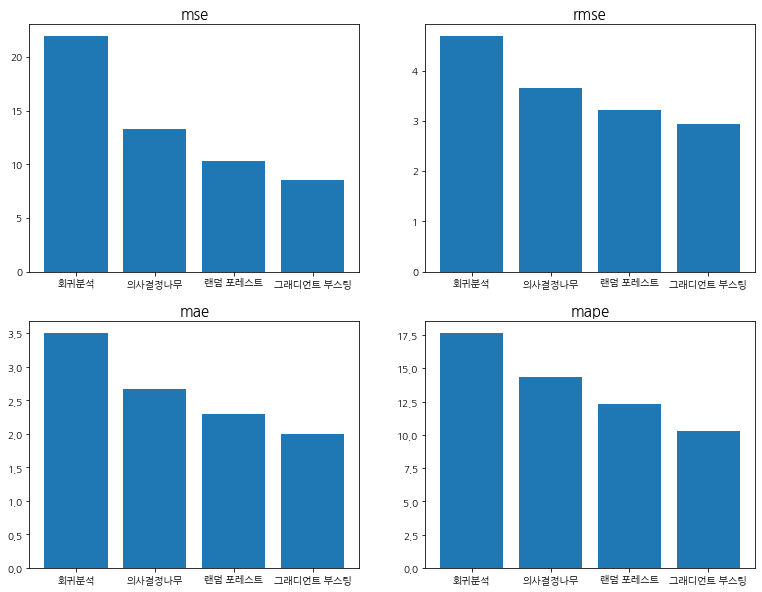

In [95]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title('mape').set_fontsize(15)

#### 분석 : mse,rmse,mae,mape를 모두 고려했을 때 그래디언트 부스팅이 가장 적으므로 정확한 값을 예측했다고 분석할 수 있다.